# 负荷预测分析

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dfold1 = pd.read_csv('prediction.csv', header=1)
new_data = {
    "日期": ["2024/6/4", "2024/6/5", "2024/6/6", "2024/6/7", "2024/6/8", "2024/6/9", "2024/6/10"],
    "云欣预测": [99.7, 99.2, 95.6, 98.3, 96.0, 99.2, 94.3],
    "清华预测": [97.6, 99.3, 96.8, 99.5, 97.4, 95.0, 88.0],
    "硕能预测": [98.0, 98.2, 96.8, 98.7, 98.4, 92.5, 85.4],
    "预报温度": ["21.0-29.0", "22.0-24.0", "20.0-26.0", "19.0-26.0", "21.0-29.0", "22.0-31.0", "23.0-27.0"],
    "实况温度": ["21.4-28.5", "19.8-23.2", "16.9-23.3", "18.5-24.9", "21.1-29.8", "22.3-31.5", "22.5-24.8"]
}

dfold = pd.DataFrame(new_data)

dfold = pd.concat([dfold1, dfold], ignore_index=True)

dfold


/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_77458/228900995.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,日期,云欣预测,清华预测,硕能预测,预报温度,实况温度
0,2023/12/4,94.7,92.2,96.8,7.0-14.0,7.0-13.8
1,2023/12/5,99.0,97.6,95.4,8.0-17.0,7.1-15.8
2,2023/12/6,98.0,97.2,98.4,9.0-16.0,9.6-17.3
3,2023/12/7,98.8,97.0,97.4,8.0-19.0,7.9-18.8
4,2023/12/8,98.3,96.3,96.8,10.0-21.0,10.3-21.2
...,...,...,...,...,...,...
164,2024/6/6,95.6,96.8,96.8,20.0-26.0,16.9-23.3
165,2024/6/7,98.3,99.5,98.7,19.0-26.0,18.5-24.9
166,2024/6/8,96.0,97.4,98.4,21.0-29.0,21.1-29.8
167,2024/6/9,99.2,95.0,92.5,22.0-31.0,22.3-31.5


In [19]:
# 移除负荷数据缺失的日期
dates_to_remove = ['2024-03-15','2024-03-17','2024-03-18','2024-03-19','2024-04-07','2024-04-08','2024-05-08','2024-05-09','2024-05-10','2024-05-11','2024-05-12','2024-05-13','2024-05-14','2024-05-15']
dfold['日期'] = pd.to_datetime(dfold['日期'])
df = dfold[~dfold['日期'].isin(pd.to_datetime(dates_to_remove))]
df.reset_index(drop=True, inplace=True)
df

,日期,云欣预测,清华预测,硕能预测,预报温度,实况温度
0,2023-12-04,94.7,92.2,96.8,7.0-14.0,7.0-13.8
1,2023-12-05,99.0,97.6,95.4,8.0-17.0,7.1-15.8
2,2023-12-06,98.0,97.2,98.4,9.0-16.0,9.6-17.3
3,2023-12-07,98.8,97.0,97.4,8.0-19.0,7.9-18.8
4,2023-12-08,98.3,96.3,96.8,10.0-21.0,10.3-21.2
...,...,...,...,...,...,...
151,2024-06-06,95.6,96.8,96.8,20.0-26.0,16.9-23.3
152,2024-06-07,98.3,99.5,98.7,19.0-26.0,18.5-24.9
153,2024-06-08,96.0,97.4,98.4,21.0-29.0,21.1-29.8
154,2024-06-09,99.2,95.0,92.5,22.0-31.0,22.3-31.5


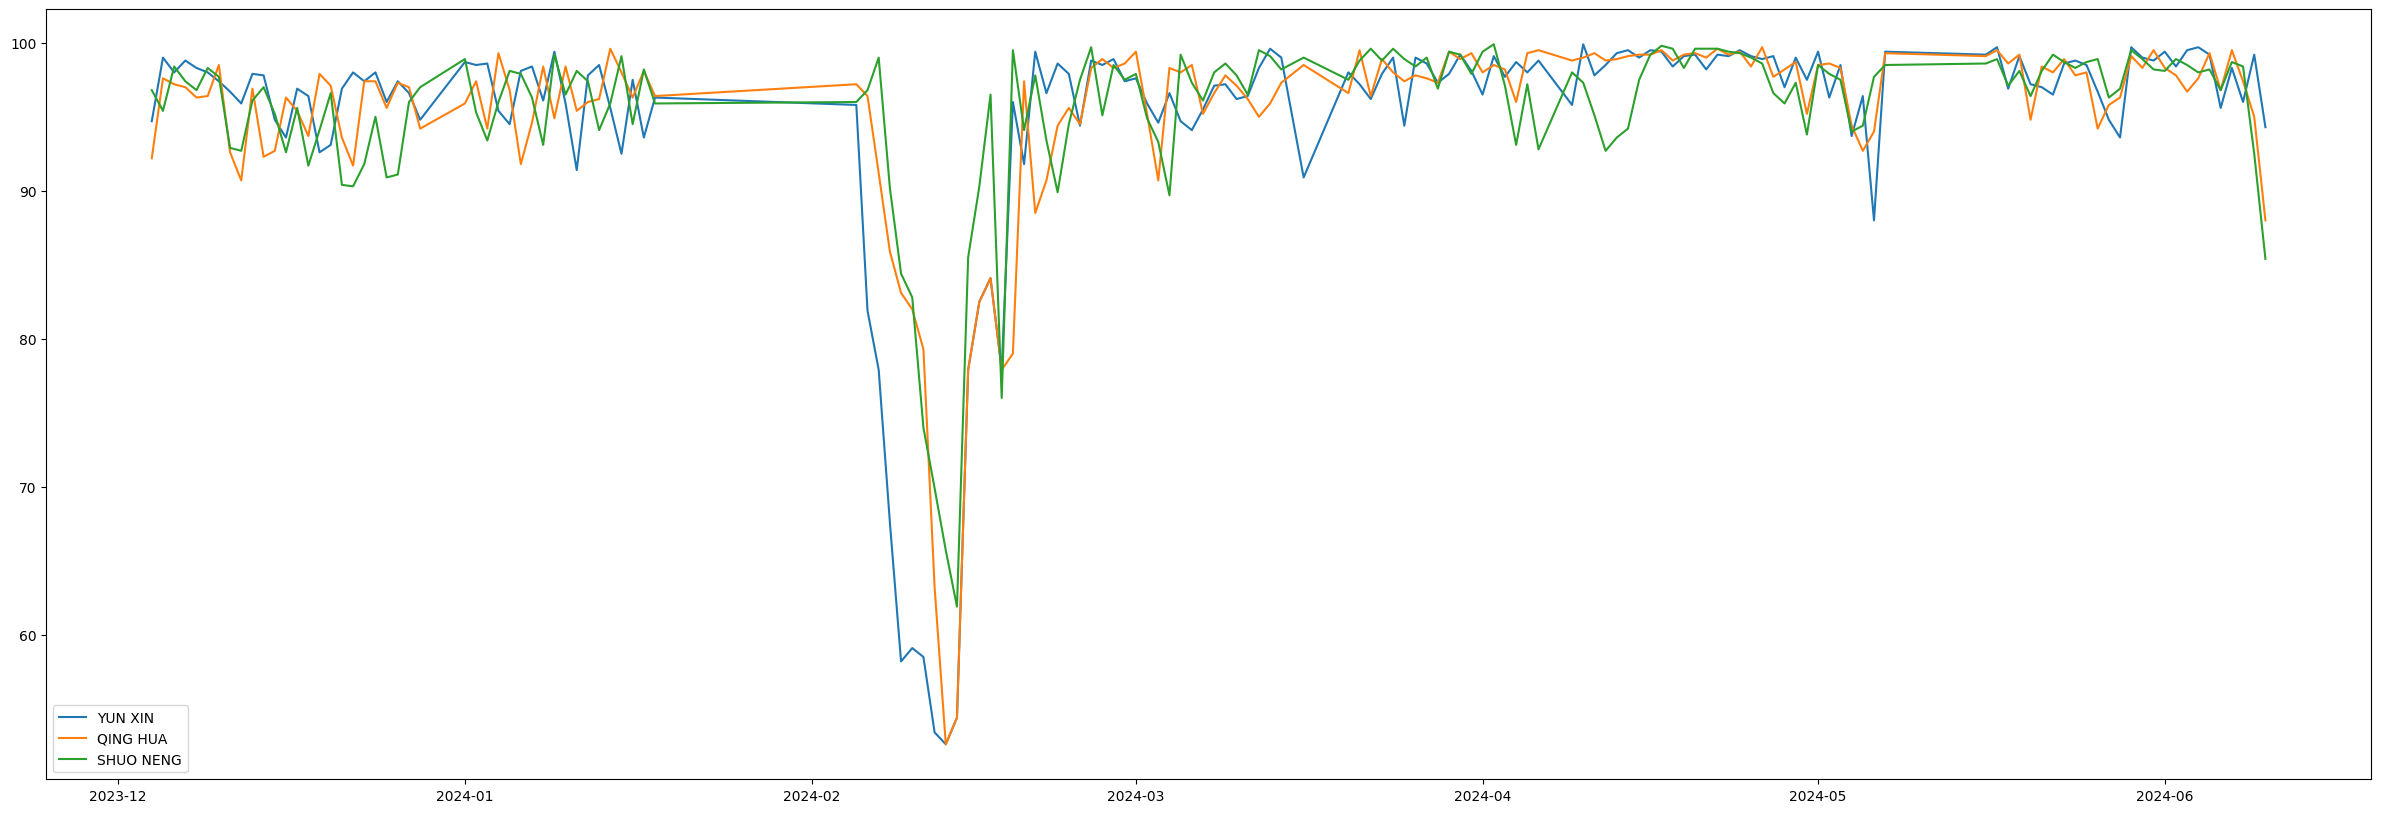

In [20]:
plt.figure(figsize=(30,10))
plt.plot(df['日期'],df['云欣预测'],label='YUN XIN')
plt.plot(df['日期'],df['清华预测'],label='QING HUA')
plt.plot(df['日期'],df['硕能预测'],label='SHUO NENG')
plt.legend()
plt.show()

### 总体预测精度平均值对比

In [21]:
df['清华预测'].mean()

95.27435897435898

In [22]:
df['云欣预测'].mean()

94.83717948717948

In [23]:
df['硕能预测'].mean()

95.56153846153846

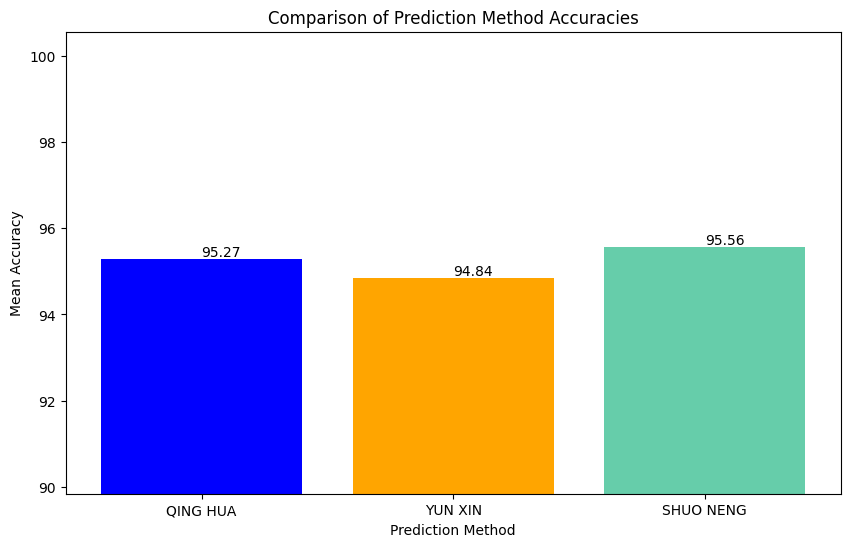

In [24]:
mean_qinghua = df['清华预测'].mean()
mean_yunxin = df['云欣预测'].mean()
mean_shuoneng = df['硕能预测'].mean()
methods = ['QING HUA', 'YUN XIN', 'SHUO NENG']
accuracies = [mean_qinghua, mean_yunxin, mean_shuoneng]
plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=['blue', 'orange', 'mediumaquamarine'])
plt.xlabel('Prediction Method')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Prediction Method Accuracies')
min_accuracy = min(accuracies) - 5
max_accuracy = max(accuracies) + 5
plt.ylim(min_accuracy, max_accuracy)
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(accuracy, 2), va='bottom')
plt.show()

### 各系统预测稳定性分析

In [25]:
statistics = {
    '系统': ['清华', '云欣', '硕能'],
    '平均值': [df['清华预测'].mean(), df['云欣预测'].mean(), df['硕能预测'].mean()],
    '标准差': [df['清华预测'].std(), df['云欣预测'].std(), df['硕能预测'].std()],
    '最小值': [df['清华预测'].min(), df['云欣预测'].min(), df['硕能预测'].min()],
    '最大值': [df['清华预测'].max(), df['云欣预测'].max(), df['硕能预测'].max()],
    '中位数': [df['清华预测'].median(), df['云欣预测'].median(), df['硕能预测'].median()],
    '范围': [df['清华预测'].max() - df['清华预测'].min(), 
              df['云欣预测'].max() - df['云欣预测'].min(), 
              df['硕能预测'].max() - df['硕能预测'].min()]
}

statistics_df = pd.DataFrame(statistics)

statistics_df


,系统,平均值,标准差,最小值,最大值,中位数,范围
0,清华,95.274359,6.993590,52.6,99.7,97.40,47.1
1,云欣,94.837179,9.008356,52.6,99.9,97.55,47.3
2,硕能,95.561538,5.777246,61.9,99.9,97.35,38.0


### 每月预测准确率对比 折线图

In [26]:
df.loc[:, '月份'] = df['日期'].dt.to_period('M')
def Range(x):
    return x.max() - x.min()
monthly_avg = df.groupby('月份').agg({
    '云欣预测': ['mean', 'max', 'min', 'median', Range],
    '清华预测': ['mean', 'max', 'min', 'median', Range],
    '硕能预测': ['mean', 'max', 'min', 'median', Range]
}).reset_index()

monthly_avg

/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_69332/1223741116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, '月份'] = df['日期'].dt.to_period('M')


月份       云欣预测                                清华预测                     \
                 mean   max   min median Range       mean   max   min median   
0  2023-12  96.600000  99.0  92.6   96.9   6.4  95.400000  98.5  90.7  96.30   
1  2024-01  96.488889  99.4  91.4   96.9   8.0  96.538889  99.6  91.8  96.35   
2  2024-02  82.004000  99.4  52.6   84.1  46.8  85.676000  98.9  52.6  88.50   
3  2024-03  96.907407  99.6  90.9   97.2   8.7  97.288889  99.5  90.7  97.60   
4  2024-04  98.600000  99.9  95.8   99.0   4.1  98.703571  99.7  95.2  99.00   
5  2024-05  97.208696  99.7  88.0   98.5  11.7  97.447826  99.5  92.7  98.30   
6  2024-06  97.960000  99.7  94.3   98.8   5.4  96.640000  99.5  88.0  97.50   

              硕能预测                           
  Range       mean   max   min median Range  
0   7.8  94.712000  98.4  90.3  95.40   8.1  
1   7.8  96.550000  99.2  93.1  96.40   6.1  
2  46.3  89.060000  99.7  61.9  94.10  37.8  
3   8.8  97.744444  99.6  89.7  98.40   9.9  
4   4.5  97.267857  99.9  92.7  97.75   7.2  
5   6.8  97.795652  99.5  94.0  98.20   5.5  
6  11.5  96.350000  98.9  85.4  98.15  13.5

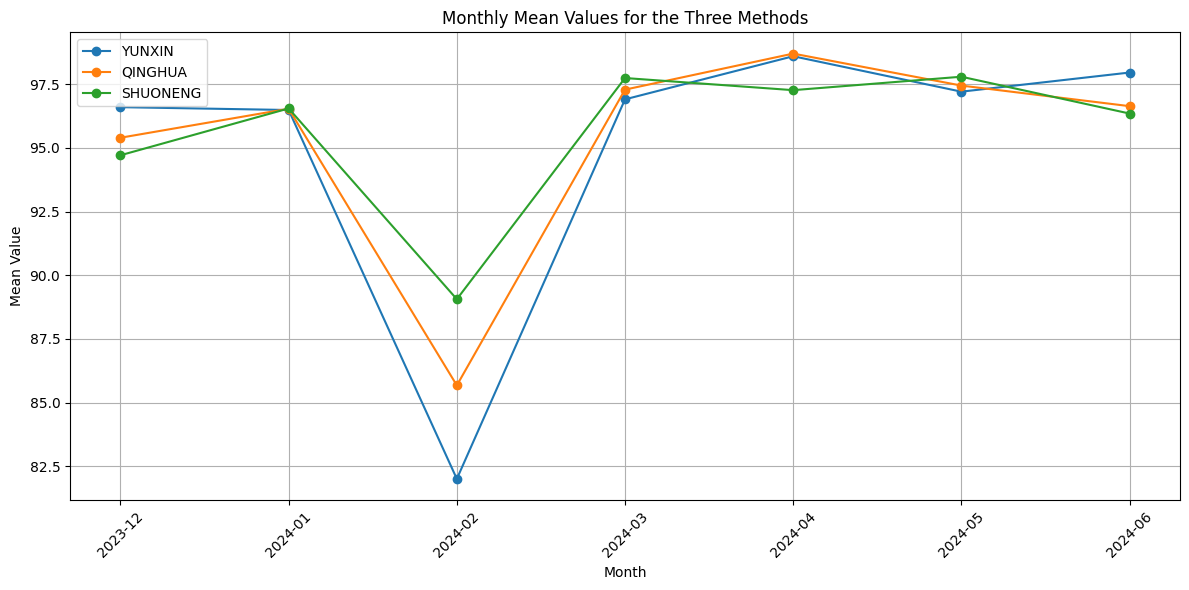

In [27]:

months = monthly_avg['月份'].astype(str)
mean_yunxin = monthly_avg['云欣预测']['mean']
mean_qinghua = monthly_avg['清华预测']['mean']
mean_shuonen = monthly_avg['硕能预测']['mean']

plt.figure(figsize=(12, 6))
plt.plot(months, mean_yunxin, marker='o', label='YUNXIN')
plt.plot(months, mean_qinghua, marker='o', label='QINGHUA')
plt.plot(months, mean_shuonen, marker='o', label='SHUONENG')


plt.title('Monthly Mean Values for the Three Methods')
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 每月各系统赢率对比

In [28]:
win_counter = {'QING HUA':0,'YUN XIN':0,'SHUO NENG':0}
results = []
for i, row in df.iterrows():
    accuracies = {
        'QING HUA': row['清华预测'],
        'YUN XIN': row['云欣预测'],
        'SHUO NENG': row['硕能预测']
    }
    winner = max(accuracies, key=accuracies.get)
    win_counter[winner] += 1
    d = {'日期':row['日期'],'Winner':winner}
    results.append(d)
results = pd.DataFrame(results)

results['月份'] = results['日期'].dt.to_period('M')
monthly_win_rates = results.groupby('月份')['Winner'].value_counts(normalize=True).unstack().fillna(0) * 100
monthly_win_rates.columns = ['QING HUA Win Rate', 'YUN XIN Win Rate', 'SHUO NENG Win Rate']
monthly_win_rates


,QING HUA Win Rate,YUN XIN Win Rate,SHUO NENG Win Rate
月份,,,
2023-12,24.000000,20.000000,56.000000
2024-01,27.777778,27.777778,44.444444
2024-02,24.000000,56.000000,20.000000
2024-03,29.629630,44.444444,25.925926
2024-04,39.285714,25.000000,35.714286
2024-05,30.434783,26.086957,43.478261
2024-06,30.000000,20.000000,50.000000


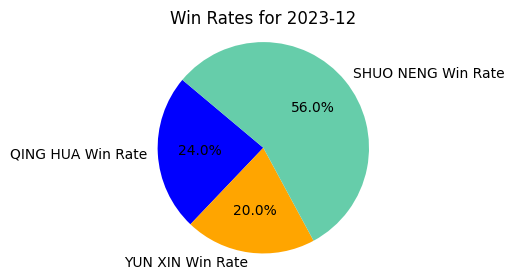

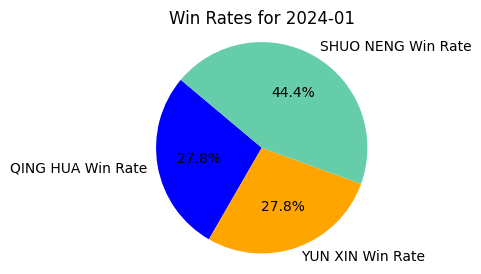

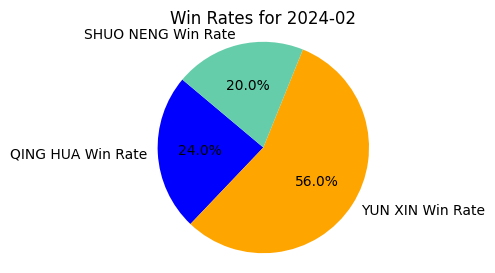

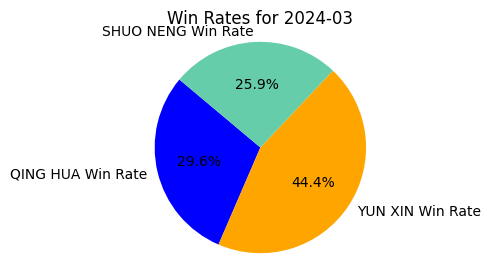

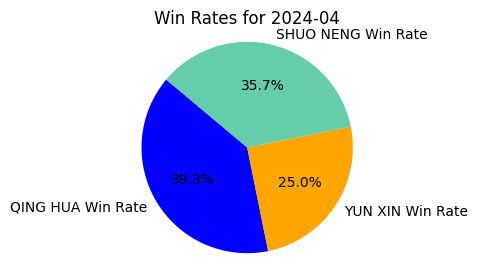

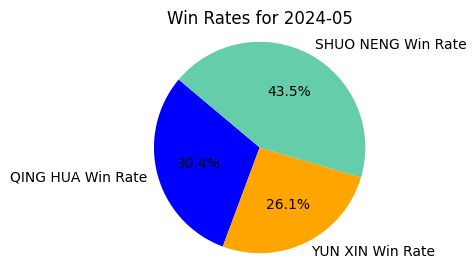

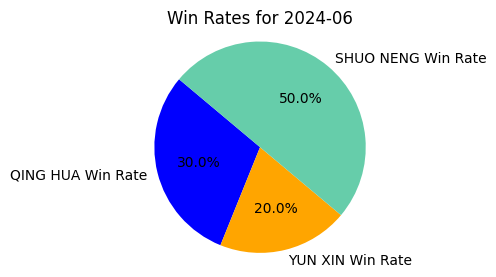

In [29]:
for month, row in monthly_win_rates.iterrows():
    labels = row.index
    sizes = row.values
    colors = ['blue', 'orange', 'mediumaquamarine']
    
    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Win Rates for {month}')
    plt.axis('equal')
    plt.show()

## 周赢率

In [30]:
results['周'] = results['日期'].dt.to_period('W')
weekly_win_rates = results.groupby('周')['Winner'].value_counts(normalize=True).unstack().fillna(0) * 100
weekly_win_rates.columns = ['QING HUA Win Rate', 'YUN XIN Win Rate', 'SHUO NENG Win Rate']

weekly_win_rates


,QING HUA Win Rate,YUN XIN Win Rate,SHUO NENG Win Rate
周,,,
2023-12-04/2023-12-10,14.285714,42.857143,42.857143
2023-12-11/2023-12-17,14.285714,14.285714,71.428571
2023-12-18/2023-12-24,42.857143,0.000000,57.142857
2023-12-25/2023-12-31,25.000000,25.000000,50.000000
2024-01-01/2024-01-07,14.285714,28.571429,57.142857
2024-01-08/2024-01-14,42.857143,14.285714,42.857143
2024-01-15/2024-01-21,25.000000,50.000000,25.000000
2024-02-05/2024-02-11,28.571429,71.428571,0.000000
2024-02-12/2024-02-18,14.285714,85.714286,0.000000


## 日赢率

In [31]:
results['日期'] = results['日期'].dt.to_period('D')
daily_win_rates = results.groupby('日期')['Winner'].value_counts(normalize=True).unstack().fillna(0) * 1
daily_win_rates.columns = ['QING HUA Win Rate', 'YUN XIN Win Rate', 'SHUO NENG Win Rate']

daily_win_rates


,QING HUA Win Rate,YUN XIN Win Rate,SHUO NENG Win Rate
日期,,,
2023-12-04,0.0,1.0,0.0
2023-12-05,0.0,0.0,1.0
2023-12-06,0.0,1.0,0.0
2023-12-07,0.0,0.0,1.0
2023-12-08,0.0,0.0,1.0
...,...,...,...
2024-06-06,1.0,0.0,0.0
2024-06-07,1.0,0.0,0.0
2024-06-08,0.0,1.0,0.0


标注：1 = win

In [32]:
shuo_neng_may_june = df[(df['日期'].dt.month.isin([5, 6])) & (df['硕能预测']<97)&(df['日期'].dt.year == 2024)][['日期', '硕能预测']]
shuo_neng_may_june

,日期,硕能预测
126,2024-05-04,94.0
127,2024-05-05,94.4
134,2024-05-20,96.4
141,2024-05-27,96.3
142,2024-05-28,96.9
151,2024-06-06,96.8
154,2024-06-09,92.5
155,2024-06-10,85.4


### 预测准确率对比

In [33]:
def accuracy(actual,predict):
    accuracy_ = (1 - abs((actual - predict) / actual))*100
    return accuracy_

def critaccuracy(actual1,actual2,actual3,actual4,i1,i2,i3,i4):
    return 0.25*(((1 - abs((actual1 - i1) / actual1))*100)+((1 - abs((actual2 - i2) / actual2))*100)+((1 - abs((actual3 - i3) / actual3))*100)+((1 - abs((actual4 - i4) / actual4))*100))

def overall(x,y):
    return 0.5*x+0.5*y

### 20240504
94.0

In [36]:
#2024-05-04 D+1
d1high0504 = accuracy(18474.44,17726.3974351156)
d1crit0504 = critaccuracy(18211.68,18143.09,18055.17,18104.44,17587.33118135780,17726.3974351156,17373.3026847954,17603.6050759065)
d1overall0504 = overall(d1high0504,d1crit0504)
d1overall0504

96.44197484832223

In [38]:
#2024-05-04 D+2
d2high0504 = accuracy(18474.44,17200.9340306053)
d2crit0504 = critaccuracy(18211.68,18143.09,18055.17,18104.44,16897.85691336410,16701.92308304930,17130.040074618000,17098.671047802300)
d2overall0504 = overall(d2high0504,d2crit0504)
d2overall0504

93.32373074667143

In [39]:
#2024-05-04 D+3
d3high0504 = accuracy(18474.44,17265.3096454834)
d3crit0504 = critaccuracy(18211.68,18143.09,18055.17,18104.44,17186.292128555900,17115.144914819900,16996.360555002800,16810.135383595600)
d3overall0504 = overall(d3high0504,d3crit0504)
d3overall0504

93.6888646691697

In [40]:
pred0504 = {
    '日期': ['2024-05-04', '2024-05-04', '2024-05-04'],
    '预测天数': ['d+1', 'd+2', 'd+3'],
    '最高预测准确率': [d1high0504, d2high0504, d3high0504],
    '关键时段预测准确率': [d1crit0504, d2crit0504, d3crit0504],
    '预测综合准确率': [d1overall0504, d2overall0504, d3overall0504]
}
results0504 = pd.DataFrame(pred0504)
results0504
#原预测准确率94.0

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-04,d+1,95.950932,96.933017,96.441975
1,2024-05-04,d+2,93.106660,93.540802,93.323731
2,2024-05-04,d+3,93.455118,93.922612,93.688865


### 20240505
94.4

In [ ]:
#2024-05-05 D+1
d1high0505 = accuracy(19123.32,18154.5629217999)
d1crit0505 = critaccuracy(18962.31,18958.78,18708.36,18749.39,17904.68391901540,17728.54806803350,17507.806795024200,17569.892435801900)
d1overall0505 = overall(d1high0505,d1high0505)
d1overall0505

94.93415851327019

In [ ]:
#2024-05-05 D+2
d2high0505 = accuracy(19123.32,18388.1792749321)
d2crit0505 = critaccuracy(18962.31,18958.78,18708.36,18749.39,18101.653321639100,18057.27037521650,18039.294911344500,18000.546700992300)
d2overall0505 = overall(d2high0505,d2crit0505)
d2overall0505

95.96987845918522

In [ ]:
#2024-05-05 D+3
d3high0505 = accuracy(19123.32,17618.9838172349)
d3crit0505 = critaccuracy(18962.31,18958.78,18708.36,18749.39,17446.08905123500,17618.983817234900,17203.35474719510,17077.217419648500)
d3overall0505 = overall(d3high0505,d3crit0505)
d3overall0505

92.06350369031084

In [ ]:
pred0505 = {
    '日期': ['2024-05-05', '2024-05-05', '2024-05-05'],
    '预测天数': ['d+1', 'd+2', 'd+3'],
    '最高预测准确率': [d1high0505, d2high0505, d3high0505],
    '关键时段预测准确率': [d1crit0505, d2crit0505, d3crit0505],
    '预测综合准确率': [d1overall0505, d2overall0505, d3overall0505]
}
results0505 = pd.DataFrame(pred0505)
results0505
#原预测准确率94.4

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-05,d+1,94.934159,93.806360,94.934159
1,2024-05-05,d+2,96.155789,95.783968,95.969878
2,2024-05-05,d+3,92.133499,91.993509,92.063504


### 20240520
96.4

In [ ]:
#2024-05-20 D+1
d1high0520 = accuracy(23003.82,22646.9998101914)
d1crit0520 = critaccuracy(21658.17,21501.47,21196.30,21044.37,20883.84745228110,20763.884853302200,20571.555791179500,20422.360714475100)
d1overall0520 = overall(d1high0520,d1crit0520)
d1overall0520

97.61084305928853

In [ ]:
#2024-05-20 D+2
d2high0520 = accuracy(23003.82,22844.9135882183)
d2crit0520 = critaccuracy(21658.17,21501.47,21196.30,21044.37,21072.551587507500,20883.34030152560,20974.748550493300,20999.12101578910)
d2overall0520 = overall(d2high0520,d2crit0520)
d2overall0520

98.79973447610197

In [ ]:
#2024-05-20 D+3
d3high0520 = accuracy(23003.82,22470.8772098918)
d3crit0520 = critaccuracy(21658.17,21501.47,21196.30,21044.37,20589.28090361150,20188.82040345210,19765.7853939375,19858.294500278800)
d3overall0520 = overall(d3high0520,d3crit0520)
d3overall0520

95.91347637547591

In [ ]:
pred0520 = {
    '日期': ['2024-05-20', '2024-05-20', '2024-05-20'],
    '预测天数': ['d+1', 'd+2', 'd+3'],
    '最高预测准确率': [d1high0520, d2high0520, d3high0520],
    '关键时段预测准确率': [d1crit0520, d2crit0520, d3crit0520],
    '预测综合准确率': [d1overall0520, d2overall0520, d3overall0520]
}
results0520 = pd.DataFrame(pred0520)
results0520
#原预测准确率96.4

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-20,d+1,98.448865,96.772821,97.610843
1,2024-05-20,d+2,99.309217,98.290252,98.799734
2,2024-05-20,d+3,97.683242,94.143711,95.913476


### 20240527
96.3

In [ ]:
#D+1
d1high0527 = accuracy(22525.83,22511.7325224292)
d1crit0527 = critaccuracy(20193.23,20055.75,19794.06,19769.93,20945.07321312920,20931.663087348300,20773.316245259900,20781.093089331600)
d1overall0527 = overall(d1crit0527,d1high0527)
d1overall0527

97.69964445742163

In [ ]:
#D+2
d2high0527 = accuracy(22525.83,22188.7543399362)
d2crit0527 = critaccuracy(20193.23,20055.75,19794.06,19769.93,20962.062073559200,20853.96102395230,20620.33146231070,20508.343020220900)
d2overall0527 = overall(d2high0527,d2crit0527)
d2overall0527

97.28971341966877

In [ ]:
#D+3
d3high0527 = accuracy(22525.83,22621.2148853363)
d3crit0527 = critaccuracy(20193.23,20055.75,19794.06,19769.93,21572.223379010600,20943.04226122620,20857.031257576400,20756.6891212516)
d3overall0527 = overall(d3high0527,d3crit0527)
d3overall0527

97.08646634251204

In [ ]:
pred0527 = {
    '日期': ['2024-05-27', '2024-05-27', '2024-05-27'],
    '预测天数': ['d+1', 'd+2', 'd+3'],
    '最高预测准确率': [d1high0527, d2high0527, d3high0527],
    '关键时段预测准确率': [d1crit0527, d2crit0527, d3crit0527],
    '预测综合准确率': [d1overall0527, d2overall0527, d3overall0527]
}
results0527 = pd.DataFrame(pred0527)
results0527
#原预测准确率96.3

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-27,d+1,99.937416,95.461873,97.699644
1,2024-05-27,d+2,98.503604,96.075823,97.289713
2,2024-05-27,d+3,99.576553,94.596379,97.086466


### 20240528
96.9

In [ ]:
#D+1
d1high0528 = accuracy(21871.89,22383.0667893172)
d1crit0528 = critaccuracy(20884.32,20607.43,20355.76,20444.68,21443.89763297410,21201.129814294700,21120.063428347800,21030.131056452100)
d1overall0528 = overall(d1high0528,d1crit0528)
d1overall0528


97.30908873477028

In [ ]:
#D+2
d2high0528 = accuracy(21871.89,21932.9041436071)
d2crit0528 = critaccuracy(20884.32,20607.43,20355.76,20444.68,20985.897793587200,20951.926981211100,20755.581064023500,20669.98891325390)
d2overall0528 = overall(d2high0528,d2crit0528)
d2overall0528

99.20748126553082

In [ ]:
#D+3
d3high0528 = accuracy(21871.89,23065.2072550048)
d3crit0528 = critaccuracy(20884.32,20607.43,20355.76,20444.68,21379.613672117400,21365.83594922990,20848.358165826100,20704.924193205000)
d3overall0528 = overall(d3high0528,d3crit0528)
d3overall0528

96.05393935388858

In [ ]:
pred0528 = {
    '日期': ['2024-05-28', '2024-05-28', '2024-05-28'],
    '预测天数': ['d+1', 'd+2', 'd+3'],
    '最高预测准确率': [d1high0528, d2high0528, d3high0528],
    '关键时段预测准确率': [d1crit0528, d2crit0528, d3crit0528],
    '预测综合准确率': [d1overall0528, d2overall0528, d3overall0528]
}
results0528 = pd.DataFrame(pred0528)
results0528
#原预测准确率96.9

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-28,d+1,97.662860,96.955318,97.309089
1,2024-05-28,d+2,99.721039,98.693924,99.207481
2,2024-05-28,d+3,94.544060,97.563819,96.053939


In [ ]:
combined_df = pd.concat([results0504, results0505,results0520,results0527,results0528], ignore_index=True)
combined_df

,日期,预测天数,最高预测准确率,关键时段预测准确率,预测综合准确率
0,2024-05-04,d+1,95.950932,96.933017,96.441975
1,2024-05-04,d+2,93.106660,93.540802,93.323731
2,2024-05-04,d+3,93.455118,93.922612,93.688865
3,2024-05-05,d+1,94.934159,93.806360,94.934159
4,2024-05-05,d+2,96.155789,95.783968,95.969878
5,2024-05-05,d+3,92.133499,91.993509,92.063504
6,2024-05-20,d+1,98.448865,96.772821,97.610843
7,2024-05-20,d+2,99.309217,98.290252,98.799734
8,2024-05-20,d+3,97.683242,94.143711,95.913476
9,2024-05-27,d+1,99.937416,95.461873,97.699644


In [ ]:
dflow = df[df['日期'].isin(['2024-05-04','2024-05-05','2024-05-20','2024-05-28'])]
dflow

/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_58374/2015112720.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dflow = df[df['日期'].isin(['2024-05-04','2024-05-05','2024-05-20','2024-05-28'])]


,日期,云欣预测,清华预测,硕能预测,预报温度,实况温度,月份
126,2024-05-04,93.7,94.4,94.0,16.0-19.0,16.5-19.1,2024-05
127,2024-05-05,96.4,92.7,94.4,17.0-23.0,16.9-21.3,2024-05
134,2024-05-20,97.2,94.8,96.4,20.0-28.0,20.9-27.2,2024-05
142,2024-05-28,93.6,96.3,96.9,17.0-27.0,17.1-27.8,2024-05


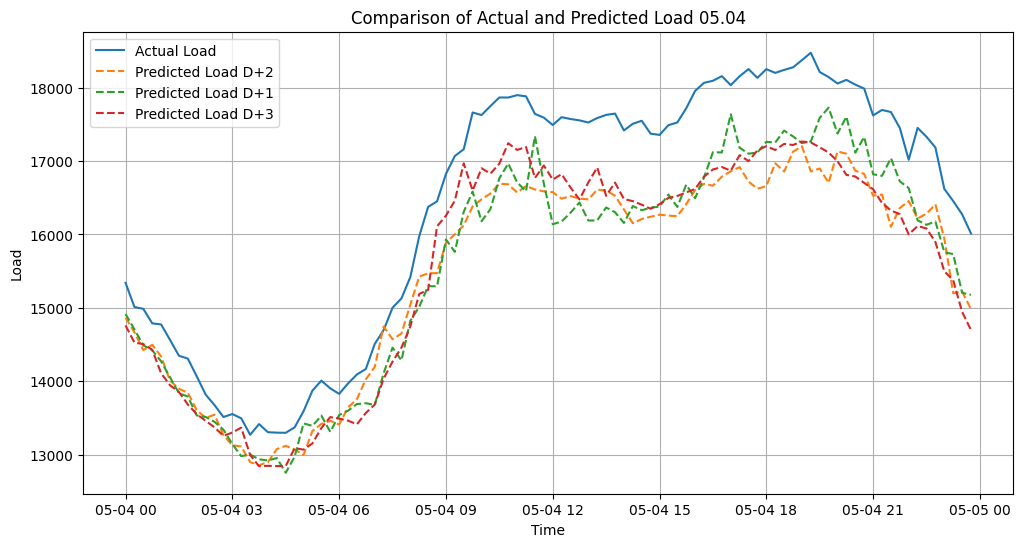

In [ ]:
df0504act = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_preprocessed/load/2024/20240504.csv')
df0504_2pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_36/20240502.csv')
df0504_1pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_12/20240503.csv')
df0504_3pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_60/20240501.csv')
df0504act['Date'] = pd.to_datetime(df0504act['Date'])
df0504_2pre['forecast_time'] = pd.to_datetime(df0504_2pre['forecast_time'])
df0504_1pre['forecast_time'] = pd.to_datetime(df0504_1pre['forecast_time'])
df0504_3pre['forecast_time'] = pd.to_datetime(df0504_3pre['forecast_time'])
df0505act = df0504act[df0504act['Date'].dt.strftime('%m-%d') == '05-04']
df0505_2pre = df0504_2pre[df0504_2pre['forecast_time'].dt.strftime('%m-%d') == '05-04']
plt.figure(figsize=(12, 6))
plt.plot(df0504act['Date'], df0504act['Load'], label='Actual Load')
plt.plot(df0504_2pre['forecast_time'], df0504_2pre['mix'], label='Predicted Load D+2', linestyle='--')
plt.plot(df0504_1pre['forecast_time'], df0504_1pre['mix'], label='Predicted Load D+1', linestyle='--')
plt.plot(df0504_3pre['forecast_time'], df0504_3pre['mix'], label='Predicted Load D+3', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Comparison of Actual and Predicted Load 05.04')
plt.legend()
plt.grid(True)
plt.show()

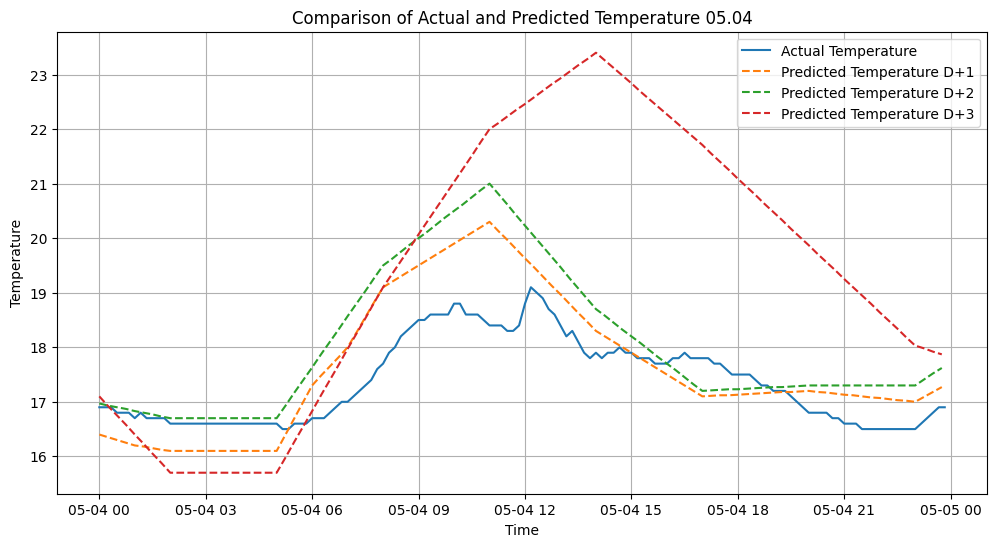

In [ ]:
import matplotlib.dates as mdates
df0504obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240504.csv')
df0504_1 = pd.read_csv('2024050308.csv')
df0504_2 = pd.read_csv('2024050208.csv')
df0504_3 = pd.read_csv('2024050108.csv')

df0504obs['datetime'] = pd.to_datetime(df0504obs['DATE_TIME'])
df0504_1['datetime'] = pd.to_datetime(df0504_1['Ybtime'])
df0504_2['datetime'] = pd.to_datetime(df0504_2['Ybtime'])
df0504_3['datetime'] = pd.to_datetime(df0504_3['Ybtime'])


forecast_0504 = df0504_1[df0504_1['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_2 = df0504_2[df0504_2['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_3 = df0504_3[df0504_3['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0504obs['datetime'], df0504obs['TEMPERATURE'], label='Actual Temperature')
plt.plot(forecast_0504['datetime'], forecast_0504['Temperature'], label='Predicted Temperature D+1', linestyle='--')
plt.plot(forecast_0504_2['datetime'], forecast_0504_2['Temperature'], label='Predicted Temperature D+2', linestyle='--')
plt.plot(forecast_0504_3['datetime'], forecast_0504_3['Temperature'], label='Predicted Temperature D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperature 05.04')
plt.legend()
plt.grid(True)
plt.show()

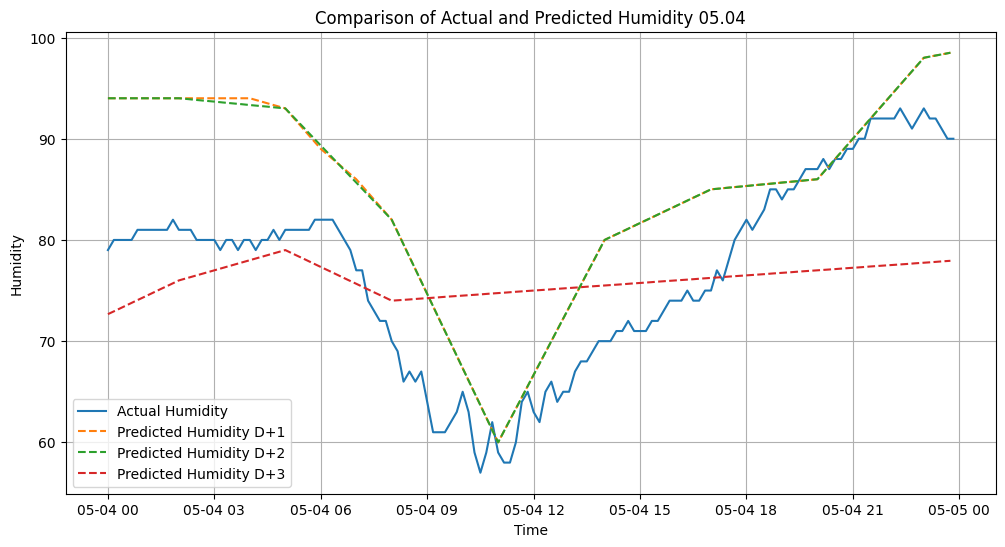

In [ ]:
df0504obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240504.csv')
df0504_1 = pd.read_csv('2024050308.csv')
df0504_2 = pd.read_csv('2024050208.csv')
df0504_3 = pd.read_csv('2024050108.csv')

df0504obs['datetime'] = pd.to_datetime(df0504obs['DATE_TIME'])
df0504_1['datetime'] = pd.to_datetime(df0504_1['Ybtime'])
df0504_2['datetime'] = pd.to_datetime(df0504_2['Ybtime'])
df0504_3['datetime'] = pd.to_datetime(df0504_3['Ybtime'])


forecast_0504 = df0504_1[df0504_1['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_2 = df0504_2[df0504_2['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_3 = df0504_3[df0504_3['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0504obs['datetime'], df0504obs['HUMIDITY'], label='Actual Humidity')
plt.plot(forecast_0504['datetime'], forecast_0504['Humidity'], label='Predicted Humidity D+1', linestyle='--')
plt.plot(forecast_0504_2['datetime'], forecast_0504_2['Humidity'], label='Predicted Humidity D+2', linestyle='--')
plt.plot(forecast_0504_3['datetime'], forecast_0504_3['Humidity'], label='Predicted Humidity D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Actual and Predicted Humidity 05.04')
plt.legend()
plt.grid(True)
plt.show()

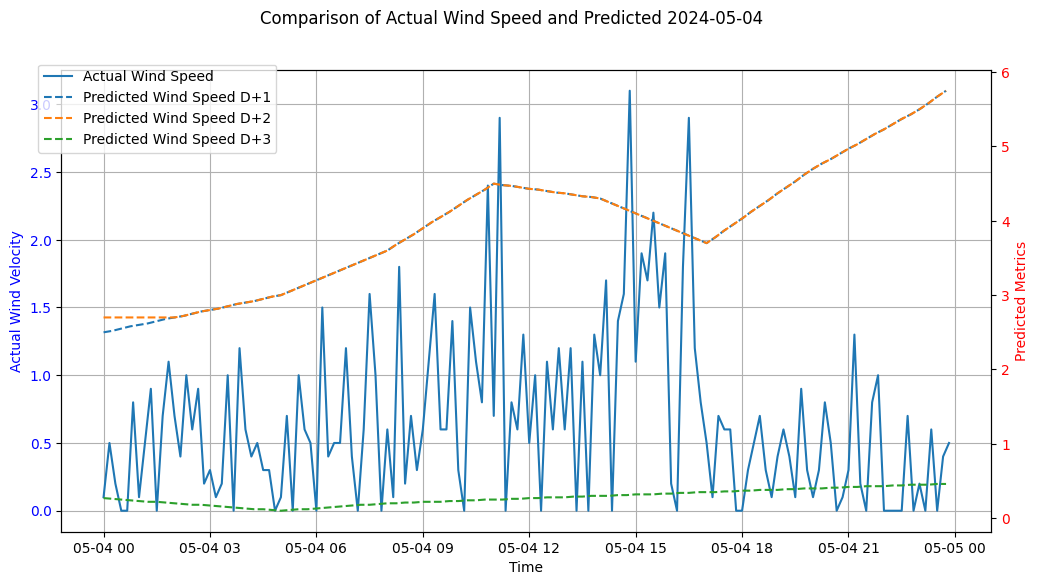

In [ ]:
df0504obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240504.csv')
df0504_1 = pd.read_csv('2024050308.csv')
df0504_2 = pd.read_csv('2024050208.csv')
df0504_3 = pd.read_csv('2024050108.csv')

df0504obs['datetime'] = pd.to_datetime(df0504obs['DATE_TIME'])
df0504_1['datetime'] = pd.to_datetime(df0504_1['Ybtime'])
df0504_2['datetime'] = pd.to_datetime(df0504_2['Ybtime'])
df0504_3['datetime'] = pd.to_datetime(df0504_3['Ybtime'])


forecast_0504 = df0504_1[df0504_1['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_2 = df0504_2[df0504_2['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]
forecast_0504_3 = df0504_3[df0504_3['datetime'].dt.date == pd.Timestamp('2024-05-04').date()]



fig,ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df0504obs['datetime'], df0504obs['WIND_VELOCITY'], label='Actual Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Wind Velocity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(forecast_0504['datetime'], forecast_0504['Wp'], label='Predicted Wind Speed D+1', linestyle='--')
ax2.plot(forecast_0504_2['datetime'], forecast_0504_2['Wp'], label='Predicted Wind Speed D+2', linestyle='--')
ax2.plot(forecast_0504_3['datetime'], forecast_0504_3['Wp'], label='Predicted Wind Speed D+3', linestyle='--')
ax2.set_ylabel('Predicted Metrics', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.suptitle('Comparison of Actual Wind Speed and Predicted 2024-05-04')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

plt.show()

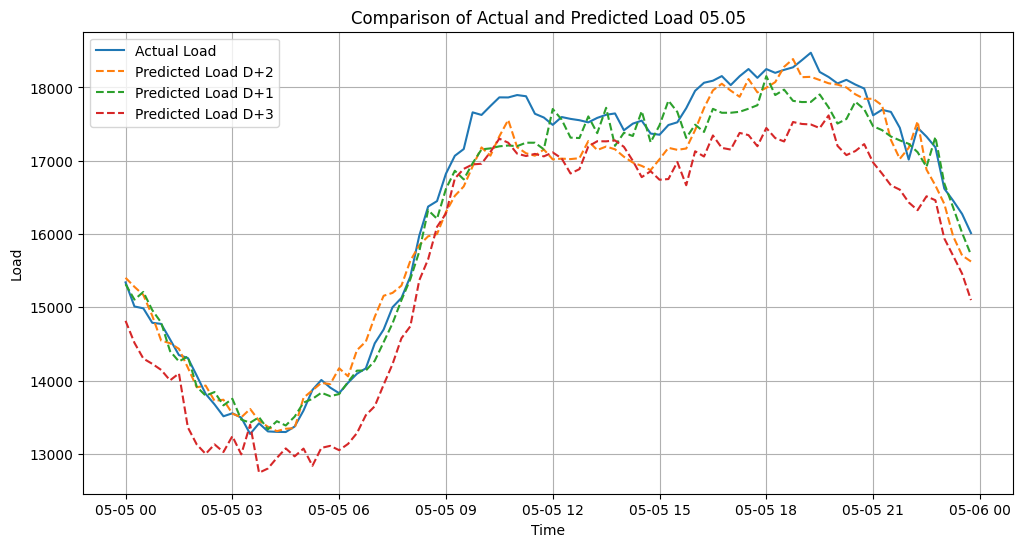

In [ ]:
df0505act = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_preprocessed/load/2024/20240505.csv')
df0505_2pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_36/20240503.csv')
df0505_1pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_12/20240504.csv')
df0505_3pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_60/20240502.csv')
df0505act['Date'] = pd.to_datetime(df0505act['Date'])
df0505_2pre['forecast_time'] = pd.to_datetime(df0505_2pre['forecast_time'])
df0505_1pre['forecast_time'] = pd.to_datetime(df0505_1pre['forecast_time'])
df0505_3pre['forecast_time'] = pd.to_datetime(df0505_3pre['forecast_time'])
df0505act = df0505act[df0505act['Date'].dt.strftime('%m-%d') == '05-05']
df0505_2pre = df0505_2pre[df0505_2pre['forecast_time'].dt.strftime('%m-%d') == '05-05']
plt.figure(figsize=(12, 6))
plt.plot(df0505act['Date'], df0504act['Load'], label='Actual Load')
plt.plot(df0505_2pre['forecast_time'], df0505_2pre['mix'], label='Predicted Load D+2', linestyle='--')
plt.plot(df0505_1pre['forecast_time'], df0505_1pre['mix'], label='Predicted Load D+1', linestyle='--')
plt.plot(df0505_3pre['forecast_time'], df0505_3pre['mix'], label='Predicted Load D+3', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Comparison of Actual and Predicted Load 05.05')
plt.legend()
plt.grid(True)
plt.show()

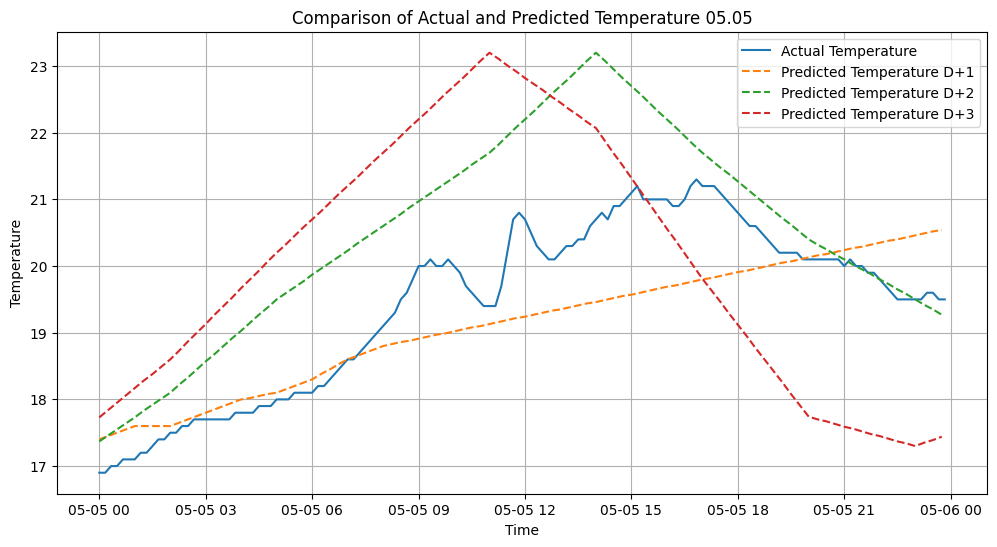

In [ ]:
import matplotlib.dates as mdates
df0505obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240505.csv')
df0505_1 = pd.read_csv('2024050408.csv')
df0505_2 = pd.read_csv('2024050308.csv')
df0505_3 = pd.read_csv('2024050208.csv')

df0505obs['datetime'] = pd.to_datetime(df0505obs['DATE_TIME'])
df0505_1['datetime'] = pd.to_datetime(df0505_1['Ybtime'])
df0505_2['datetime'] = pd.to_datetime(df0505_2['Ybtime'])
df0505_3['datetime'] = pd.to_datetime(df0505_3['Ybtime'])


forecast_0505 = df0505_1[df0505_1['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]
forecast_0505_2 = df0505_2[df0505_2['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]
forecast_0505_3 = df0505_3[df0505_3['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0505obs['datetime'], df0505obs['TEMPERATURE'], label='Actual Temperature')
plt.plot(forecast_0505['datetime'], forecast_0505['Temperature'], label='Predicted Temperature D+1', linestyle='--')
plt.plot(forecast_0505_2['datetime'], forecast_0505_2['Temperature'], label='Predicted Temperature D+2', linestyle='--')
plt.plot(forecast_0505_3['datetime'], forecast_0505_3['Temperature'], label='Predicted Temperature D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperature 05.05')
plt.legend()
plt.grid(True)
plt.show()

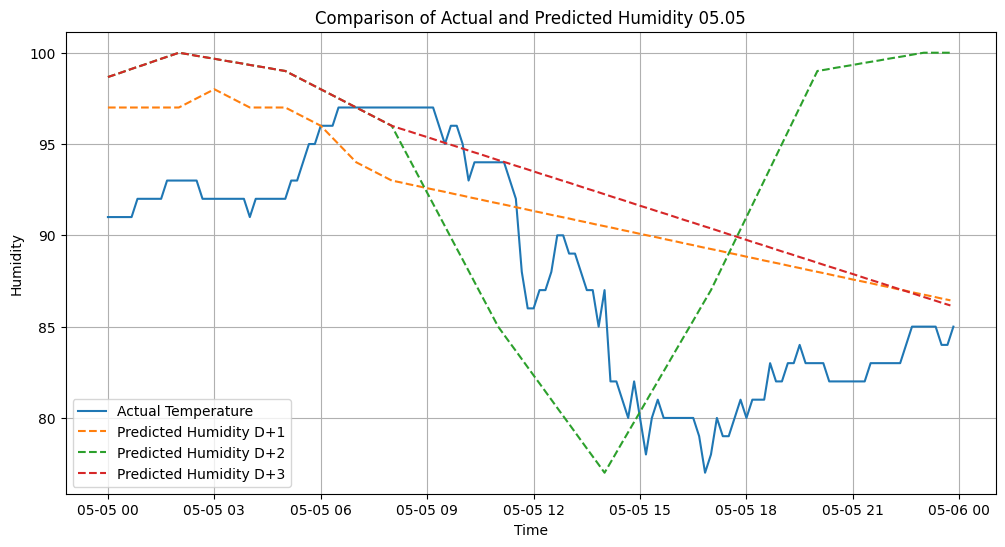

In [ ]:
import matplotlib.dates as mdates
df0505obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240505.csv')
df0505_1 = pd.read_csv('2024050408.csv')
df0505_2 = pd.read_csv('2024050308.csv')
df0505_3 = pd.read_csv('2024050208.csv')

df0505obs['datetime'] = pd.to_datetime(df0505obs['DATE_TIME'])
df0505_1['datetime'] = pd.to_datetime(df0505_1['Ybtime'])
df0505_2['datetime'] = pd.to_datetime(df0505_2['Ybtime'])
df0505_3['datetime'] = pd.to_datetime(df0505_3['Ybtime'])


forecast_0505 = df0505_1[df0505_1['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]
forecast_0505_2 = df0505_2[df0505_2['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]
forecast_0505_3 = df0505_3[df0505_3['datetime'].dt.date == pd.Timestamp('2024-05-05').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0505obs['datetime'], df0505obs['HUMIDITY'], label='Actual Temperature')
plt.plot(forecast_0505['datetime'], forecast_0505['Humidity'], label='Predicted Humidity D+1', linestyle='--')
plt.plot(forecast_0505_2['datetime'], forecast_0505_2['Humidity'], label='Predicted Humidity D+2', linestyle='--')
plt.plot(forecast_0505_3['datetime'], forecast_0505_3['Humidity'], label='Predicted Humidity D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Actual and Predicted Humidity 05.05')
plt.legend()
plt.grid(True)
plt.show()

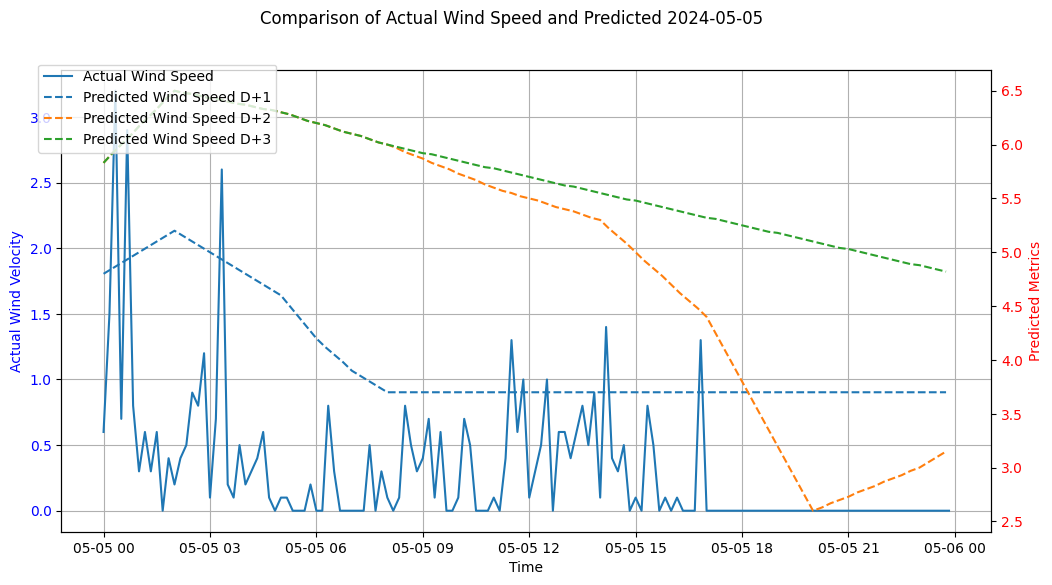

In [ ]:
fig,ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df0505obs['datetime'], df0505obs['WIND_VELOCITY'], label='Actual Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Wind Velocity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(forecast_0505['datetime'], forecast_0505['Wp'], label='Predicted Wind Speed D+1', linestyle='--')
ax2.plot(forecast_0505_2['datetime'], forecast_0505_2['Wp'], label='Predicted Wind Speed D+2', linestyle='--')
ax2.plot(forecast_0505_3['datetime'], forecast_0505_3['Wp'], label='Predicted Wind Speed D+3', linestyle='--')
ax2.set_ylabel('Predicted Metrics', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.suptitle('Comparison of Actual Wind Speed and Predicted 2024-05-05')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

plt.show()

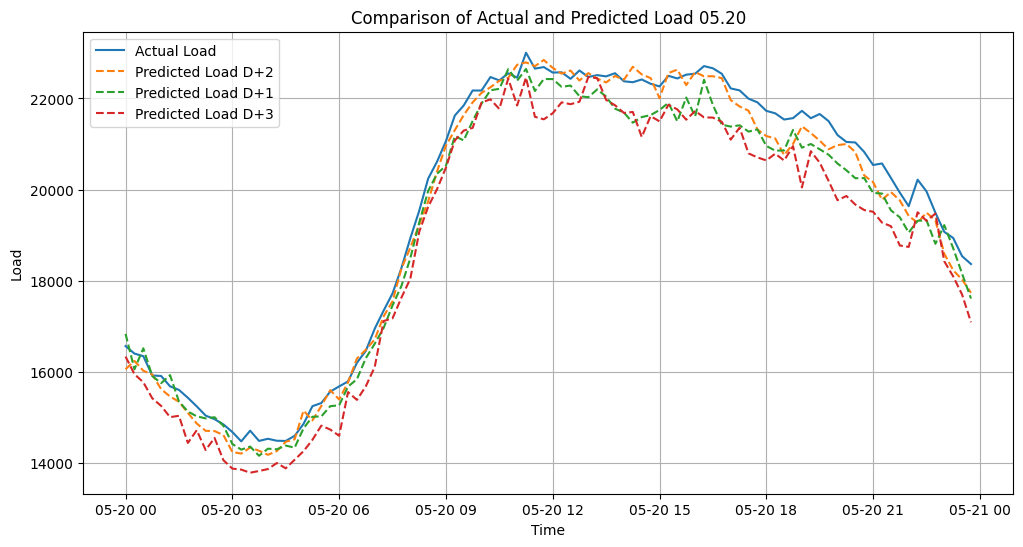

In [ ]:
df0520act = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_preprocessed/load/2024/20240520.csv')
df0520_2pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_36/20240518.csv')
df0520_1pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_12/20240519.csv')
df0520_3pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_60/20240517.csv')
df0520act['Date'] = pd.to_datetime(df0520act['Date'])
df0520_2pre['forecast_time'] = pd.to_datetime(df0520_2pre['forecast_time'])
df0520_1pre['forecast_time'] = pd.to_datetime(df0520_1pre['forecast_time'])
df0520_3pre['forecast_time'] = pd.to_datetime(df0520_3pre['forecast_time'])
df0520act = df0520act[df0520act['Date'].dt.strftime('%m-%d') == '05-20']
df0520_2pre = df0520_2pre[df0520_2pre['forecast_time'].dt.strftime('%m-%d') == '05-20']
plt.figure(figsize=(12, 6))
plt.plot(df0520act['Date'], df0520act['Load'], label='Actual Load')
plt.plot(df0520_2pre['forecast_time'], df0520_2pre['mix'], label='Predicted Load D+2', linestyle='--')
plt.plot(df0520_1pre['forecast_time'], df0520_1pre['mix'], label='Predicted Load D+1', linestyle='--')
plt.plot(df0520_3pre['forecast_time'], df0520_3pre['mix'], label='Predicted Load D+3', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Comparison of Actual and Predicted Load 05.20')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.dates as mdates
df0520obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240520.csv')
df0520_1 = pd.read_csv('2024051908.csv')
df0520_2 = pd.read_csv('2024051808.csv')
df0520_3 = pd.read_csv('2024051708.csv')

df0520obs['datetime'] = pd.to_datetime(df0520obs['DATE_TIME'])
df0520_1['datetime'] = pd.to_datetime(df0520_1['Ybtime'])
df0520_2['datetime'] = pd.to_datetime(df0520_2['Ybtime'])
df0520_3['datetime'] = pd.to_datetime(df0520_3['Ybtime'])


forecast_0520 = df0520_1[df0520_1['datetime'].dt.date == pd.Timestamp('2024-05-20').date()]
forecast_0520_2 = df0520_2[df0520_2['datetime'].dt.date == pd.Timestamp('2024-05-20').date()]
forecast_0520_3 = df0520_3[df0520_3['datetime'].dt.date == pd.Timestamp('2024-05-20').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0520obs['datetime'], df0520obs['TEMPERATURE'], label='Actual Temperature')
plt.plot(forecast_0520['datetime'], forecast_0520['Temperature'], label='Predicted Temperature D+1', linestyle='--')
plt.plot(forecast_0520_2['datetime'], forecast_0520_2['Temperature'], label='Predicted Temperature D+2', linestyle='--')
plt.plot(forecast_0520_3['datetime'], forecast_0520_3['Temperature'], label='Predicted Temperature D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperature 05.20')
plt.legend()
plt.grid(True)
plt.show()

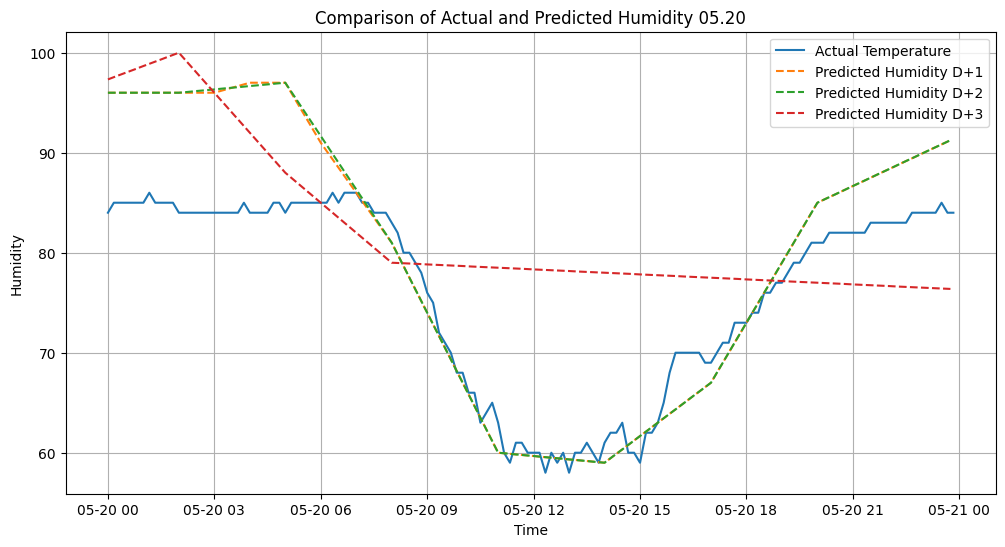

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df0520obs['datetime'], df0520obs['HUMIDITY'], label='Actual Temperature')
plt.plot(forecast_0520['datetime'], forecast_0520['Humidity'], label='Predicted Humidity D+1', linestyle='--')
plt.plot(forecast_0520_2['datetime'], forecast_0520_2['Humidity'], label='Predicted Humidity D+2', linestyle='--')
plt.plot(forecast_0520_3['datetime'], forecast_0520_3['Humidity'], label='Predicted Humidity D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Actual and Predicted Humidity 05.20')
plt.legend()
plt.grid(True)
plt.show()

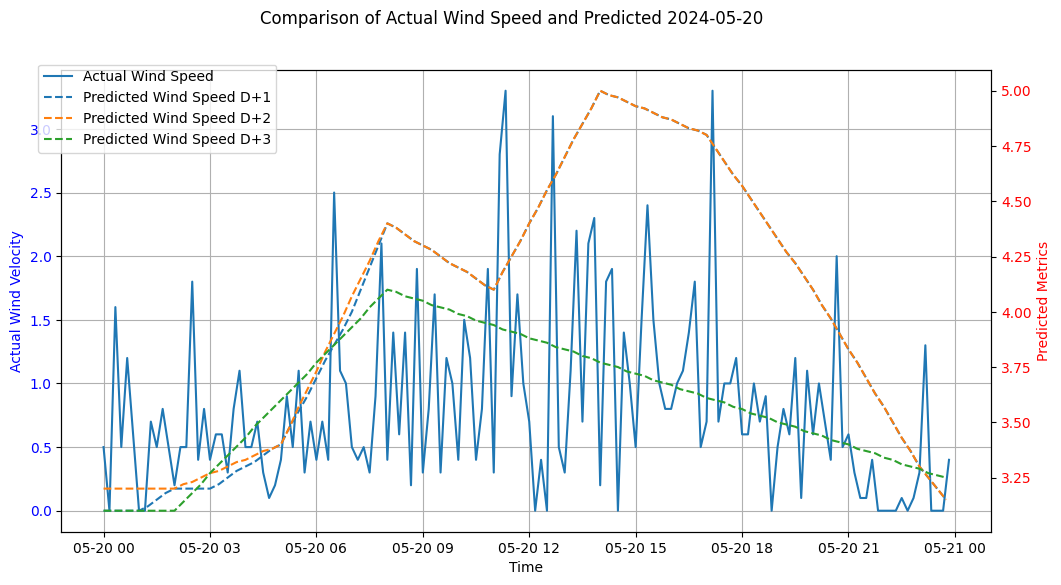

In [ ]:
fig,ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df0520obs['datetime'], df0520obs['WIND_VELOCITY'], label='Actual Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Wind Velocity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(forecast_0520['datetime'], forecast_0520['Wp'], label='Predicted Wind Speed D+1', linestyle='--')
ax2.plot(forecast_0520_2['datetime'], forecast_0520_2['Wp'], label='Predicted Wind Speed D+2', linestyle='--')
ax2.plot(forecast_0520_3['datetime'], forecast_0520_3['Wp'], label='Predicted Wind Speed D+3', linestyle='--')
ax2.set_ylabel('Predicted Metrics', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.suptitle('Comparison of Actual Wind Speed and Predicted 2024-05-20')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

plt.show()

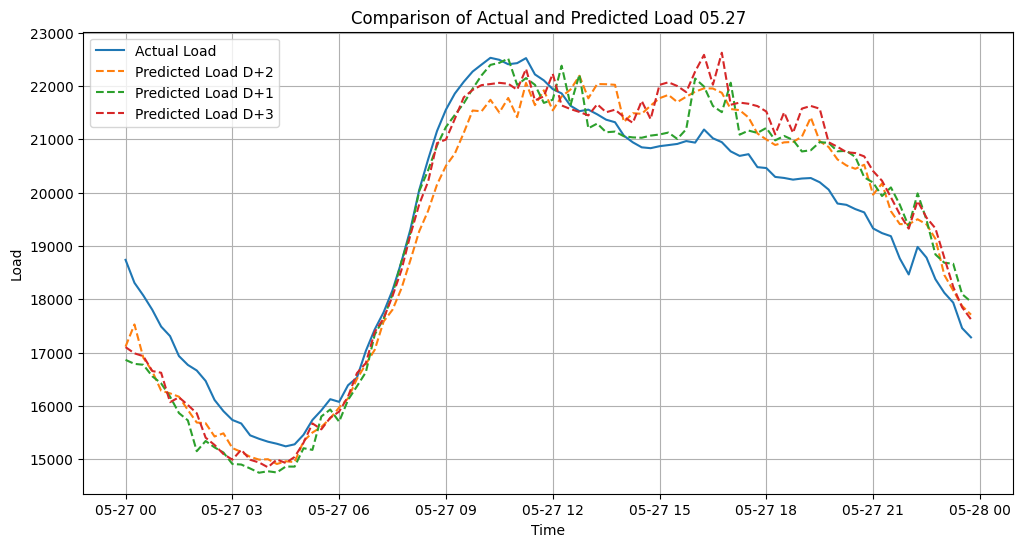

In [ ]:
df0527act = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_preprocessed/load/2024/20240527.csv')
df0527_2pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_36/20240525.csv')
df0527_1pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_12/20240526.csv')
df0527_3pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_60/20240524.csv')
df0527act['Date'] = pd.to_datetime(df0527act['Date'])
df0527_2pre['forecast_time'] = pd.to_datetime(df0527_2pre['forecast_time'])
df0527_1pre['forecast_time'] = pd.to_datetime(df0527_1pre['forecast_time'])
df0527_3pre['forecast_time'] = pd.to_datetime(df0527_3pre['forecast_time'])
df0527act = df0527act[df0527act['Date'].dt.strftime('%m-%d') == '05-27']
df0527_2pre = df0527_2pre[df0527_2pre['forecast_time'].dt.strftime('%m-%d') == '05-27']
plt.figure(figsize=(12, 6))
plt.plot(df0527act['Date'], df0527act['Load'], label='Actual Load')
plt.plot(df0527_2pre['forecast_time'], df0527_2pre['mix'], label='Predicted Load D+2', linestyle='--')
plt.plot(df0527_1pre['forecast_time'], df0527_1pre['mix'], label='Predicted Load D+1', linestyle='--')
plt.plot(df0527_3pre['forecast_time'], df0527_3pre['mix'], label='Predicted Load D+3', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Comparison of Actual and Predicted Load 05.27')
plt.legend()
plt.grid(True)
plt.show()

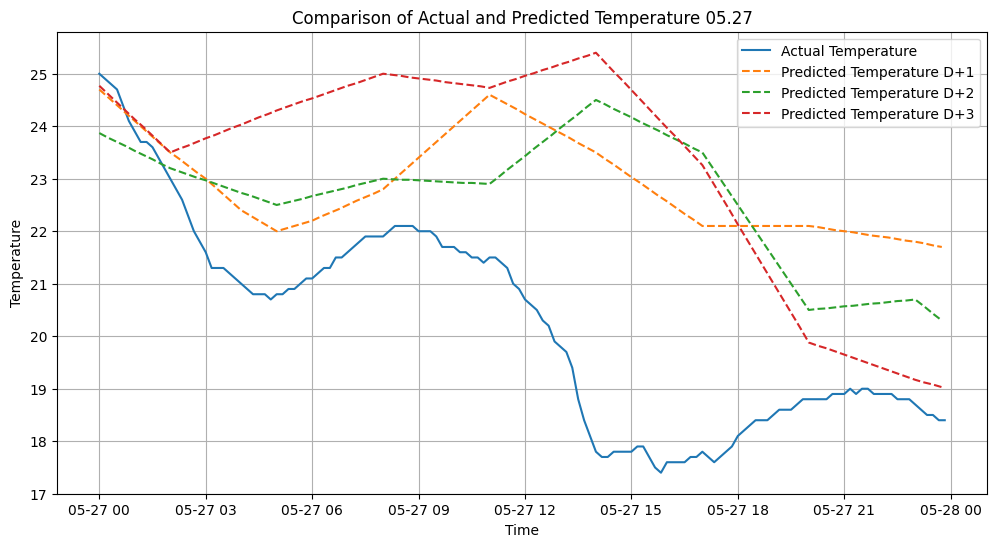

In [ ]:
import matplotlib.dates as mdates
df0527obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240527.csv')
df0527_1 = pd.read_csv('2024052608.csv')
df0527_2 = pd.read_csv('2024052508.csv')
df0527_3 = pd.read_csv('2024052408.csv')

df0527obs['datetime'] = pd.to_datetime(df0527obs['DATE_TIME'])
df0527_1['datetime'] = pd.to_datetime(df0527_1['Ybtime'])
df0527_2['datetime'] = pd.to_datetime(df0527_2['Ybtime'])
df0527_3['datetime'] = pd.to_datetime(df0527_3['Ybtime'])


forecast_0527 = df0527_1[df0527_1['datetime'].dt.date == pd.Timestamp('2024-05-27').date()]
forecast_0527_2 = df0527_2[df0527_2['datetime'].dt.date == pd.Timestamp('2024-05-27').date()]
forecast_0527_3 = df0527_3[df0527_3['datetime'].dt.date == pd.Timestamp('2024-05-27').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0527obs['datetime'], df0527obs['TEMPERATURE'], label='Actual Temperature')
plt.plot(forecast_0527['datetime'], forecast_0527['Temperature'], label='Predicted Temperature D+1', linestyle='--')
plt.plot(forecast_0527_2['datetime'], forecast_0527_2['Temperature'], label='Predicted Temperature D+2', linestyle='--')
plt.plot(forecast_0527_3['datetime'], forecast_0527_3['Temperature'], label='Predicted Temperature D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperature 05.27')
plt.legend()
plt.grid(True)
plt.show()

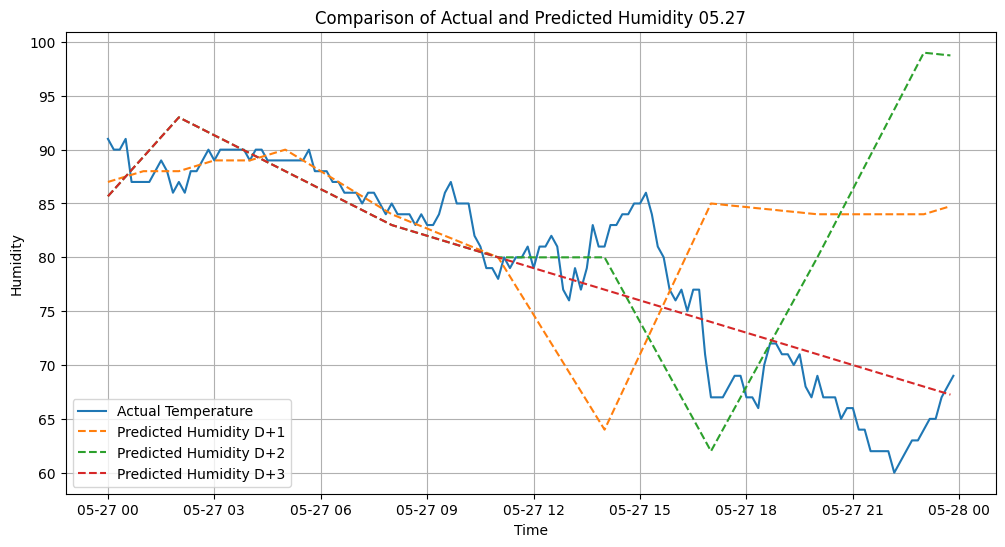

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df0527obs['datetime'], df0527obs['HUMIDITY'], label='Actual Temperature')
plt.plot(forecast_0527['datetime'], forecast_0527['Humidity'], label='Predicted Humidity D+1', linestyle='--')
plt.plot(forecast_0527_2['datetime'], forecast_0527_2['Humidity'], label='Predicted Humidity D+2', linestyle='--')
plt.plot(forecast_0527_3['datetime'], forecast_0527_3['Humidity'], label='Predicted Humidity D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Actual and Predicted Humidity 05.27')
plt.legend()
plt.grid(True)
plt.show()

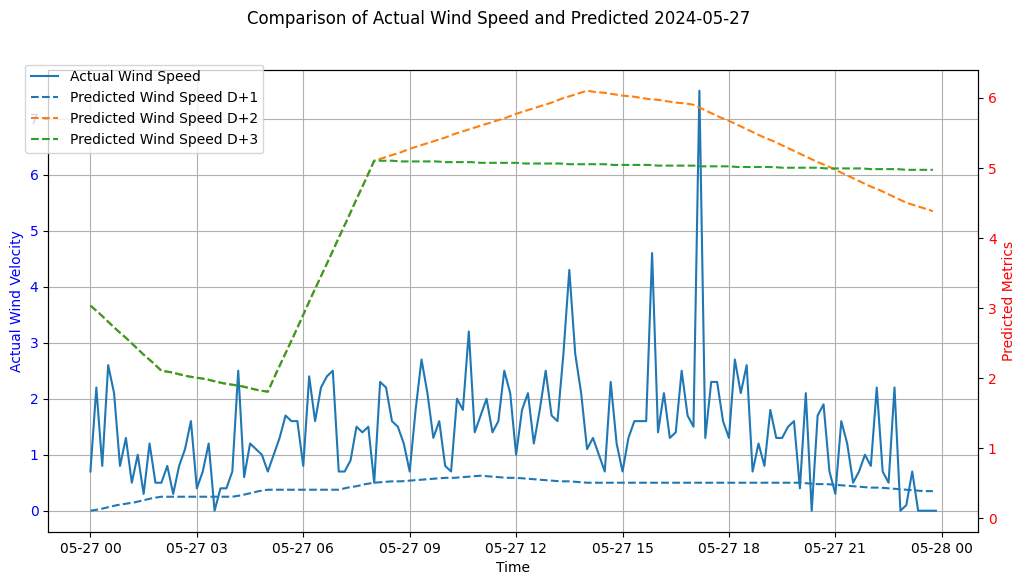

In [ ]:
fig,ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df0527obs['datetime'], df0527obs['WIND_VELOCITY'], label='Actual Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Wind Velocity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(forecast_0527['datetime'], forecast_0527['Wp'], label='Predicted Wind Speed D+1', linestyle='--')
ax2.plot(forecast_0527_2['datetime'], forecast_0527_2['Wp'], label='Predicted Wind Speed D+2', linestyle='--')
ax2.plot(forecast_0527_3['datetime'], forecast_0527_3['Wp'], label='Predicted Wind Speed D+3', linestyle='--')
ax2.set_ylabel('Predicted Metrics', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.suptitle('Comparison of Actual Wind Speed and Predicted 2024-05-27')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

plt.show()

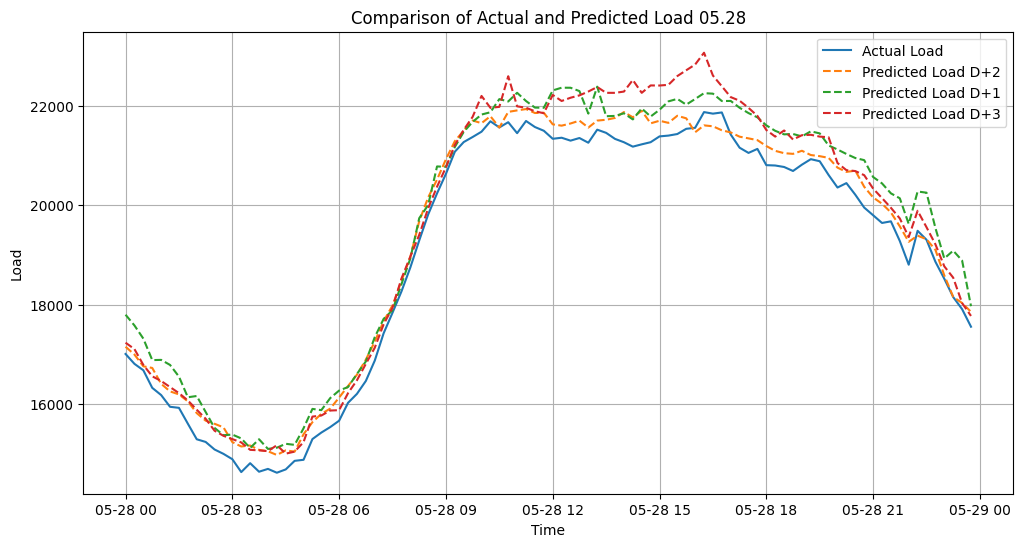

In [ ]:
df0528act = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_preprocessed/load/2024/20240528.csv')
df0528_2pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_36/20240526.csv')
df0528_1pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_12/20240527.csv')
df0528_3pre = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/results/2024/start_lead_60/20240525.csv')
df0528act['Date'] = pd.to_datetime(df0528act['Date'])
df0528_2pre['forecast_time'] = pd.to_datetime(df0528_2pre['forecast_time'])
df0528_1pre['forecast_time'] = pd.to_datetime(df0528_1pre['forecast_time'])
df0528_3pre['forecast_time'] = pd.to_datetime(df0528_3pre['forecast_time'])
df0528act = df0528act[df0528act['Date'].dt.strftime('%m-%d') == '05-28']
df0528_2pre = df0528_2pre[df0528_2pre['forecast_time'].dt.strftime('%m-%d') == '05-28']
plt.figure(figsize=(12, 6))
plt.plot(df0528act['Date'], df0528act['Load'], label='Actual Load')
plt.plot(df0528_2pre['forecast_time'], df0528_2pre['mix'], label='Predicted Load D+2', linestyle='--')
plt.plot(df0528_1pre['forecast_time'], df0528_1pre['mix'], label='Predicted Load D+1', linestyle='--')
plt.plot(df0528_3pre['forecast_time'], df0528_3pre['mix'], label='Predicted Load D+3', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Comparison of Actual and Predicted Load 05.28')
plt.legend()
plt.grid(True)
plt.show()

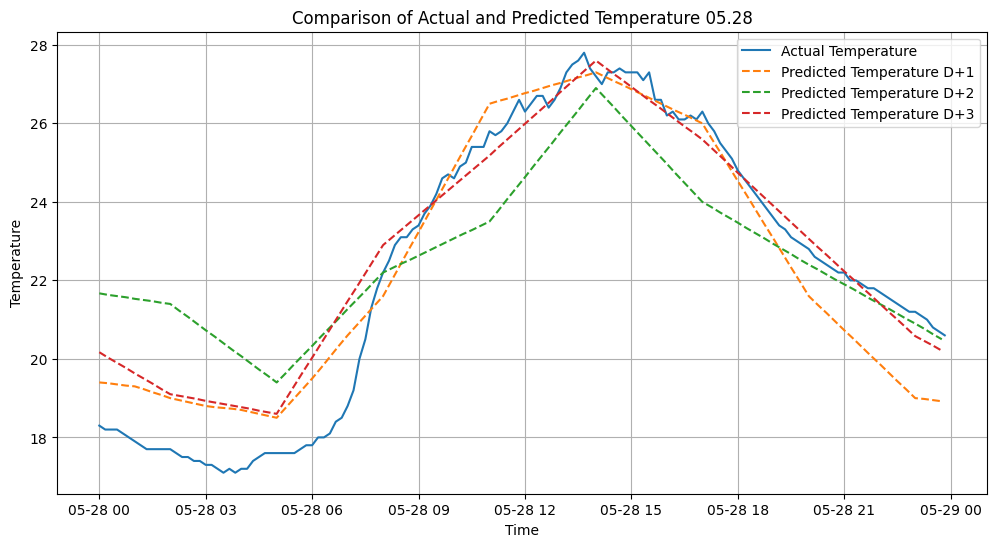

In [ ]:
import matplotlib.dates as mdates
df0528obs = pd.read_csv('/Users/maxz/Desktop/EQUOTA/data/data_raw/obs_weather_db/2024/20240528.csv')
df0528_1 = pd.read_csv('2024052708.csv')
df0528_2 = pd.read_csv('2024052608.csv')
df0528_3 = pd.read_csv('2024052508.csv')

df0528obs['datetime'] = pd.to_datetime(df0528obs['DATE_TIME'])
df0528_1['datetime'] = pd.to_datetime(df0528_1['Ybtime'])
df0528_2['datetime'] = pd.to_datetime(df0528_2['Ybtime'])
df0528_3['datetime'] = pd.to_datetime(df0528_3['Ybtime'])


forecast_0528 = df0528_1[df0528_1['datetime'].dt.date == pd.Timestamp('2024-05-28').date()]
forecast_0528_2 = df0528_2[df0528_2['datetime'].dt.date == pd.Timestamp('2024-05-28').date()]
forecast_0528_3 = df0528_3[df0528_3['datetime'].dt.date == pd.Timestamp('2024-05-28').date()]



plt.figure(figsize=(12, 6))
plt.plot(df0528obs['datetime'], df0528obs['TEMPERATURE'], label='Actual Temperature')
plt.plot(forecast_0528['datetime'], forecast_0528['Temperature'], label='Predicted Temperature D+1', linestyle='--')
plt.plot(forecast_0528_2['datetime'], forecast_0528_2['Temperature'], label='Predicted Temperature D+2', linestyle='--')
plt.plot(forecast_0528_3['datetime'], forecast_0528_3['Temperature'], label='Predicted Temperature D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperature 05.28')
plt.legend()
plt.grid(True)
plt.show()

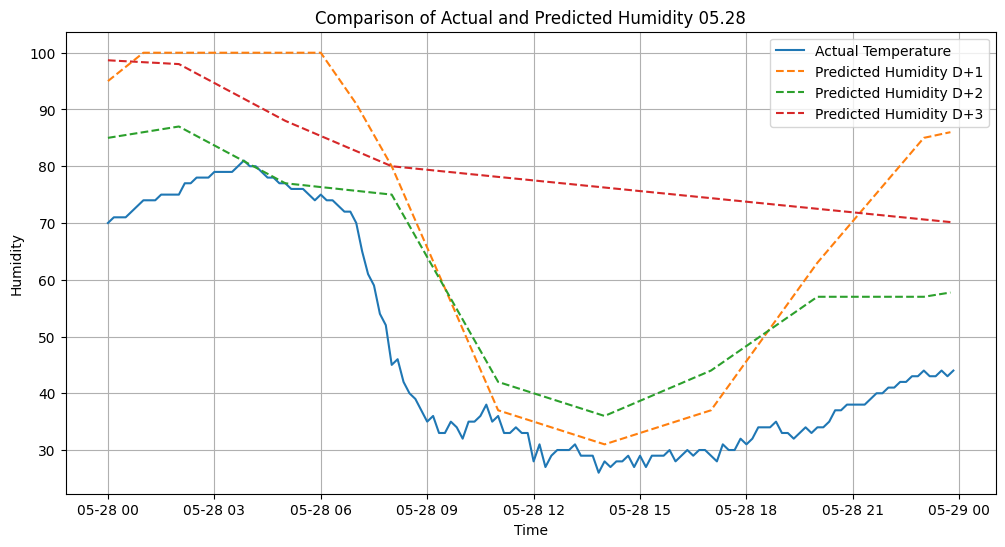

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df0528obs['datetime'], df0528obs['HUMIDITY'], label='Actual Temperature')
plt.plot(forecast_0528['datetime'], forecast_0528['Humidity'], label='Predicted Humidity D+1', linestyle='--')
plt.plot(forecast_0528_2['datetime'], forecast_0528_2['Humidity'], label='Predicted Humidity D+2', linestyle='--')
plt.plot(forecast_0528_3['datetime'], forecast_0528_3['Humidity'], label='Predicted Humidity D+3', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Actual and Predicted Humidity 05.28')
plt.legend()
plt.grid(True)
plt.show()

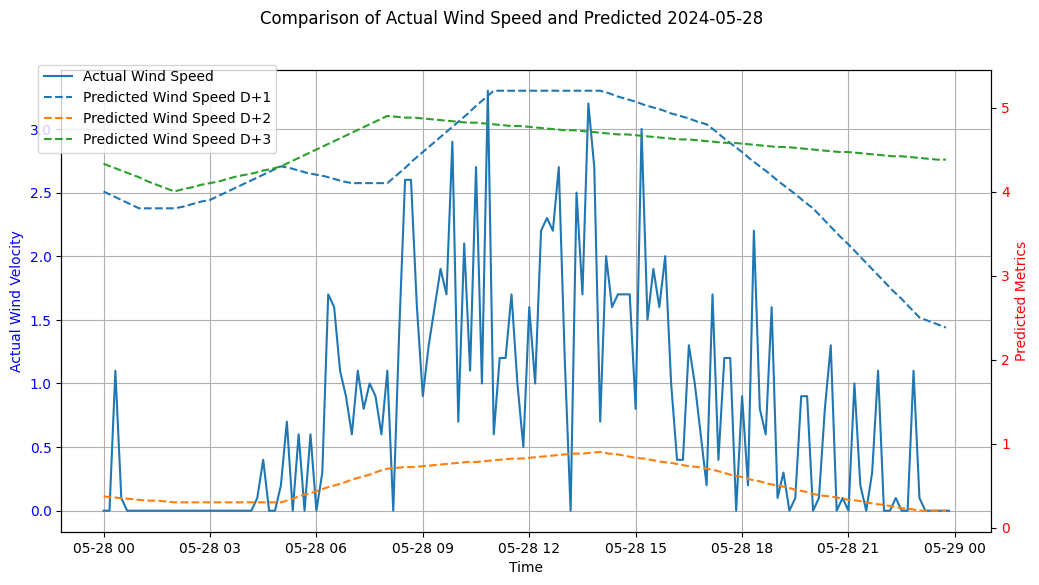

In [ ]:
fig,ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df0528obs['datetime'], df0528obs['WIND_VELOCITY'], label='Actual Wind Speed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Wind Velocity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(forecast_0528['datetime'], forecast_0528['Wp'], label='Predicted Wind Speed D+1', linestyle='--')
ax2.plot(forecast_0528_2['datetime'], forecast_0528_2['Wp'], label='Predicted Wind Speed D+2', linestyle='--')
ax2.plot(forecast_0528_3['datetime'], forecast_0528_3['Wp'], label='Predicted Wind Speed D+3', linestyle='--')
ax2.set_ylabel('Predicted Metrics', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.suptitle('Comparison of Actual Wind Speed and Predicted 2024-05-28')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

plt.show()